<a href="https://colab.research.google.com/github/CookiesAndWater/MAT_422/blob/main/MAT_422_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3.1. Necessary and Sufficient Conditions of Local Minimizers

**Assume that for all functions, $f:\mathbb{R}^d → \mathbb{R}$**

* The goal is to find an optimization of the form
  * min$_{x∈ \mathbb{R}^d}f(x)$

* **Global Minimizer**: There is a point, $x^*$, which is called the global minimizer of $f$ if
  * $f(x) ≥ f(x^*),$  for all $x$.

* **Local Minimizer**: There is a point, $x^*$, which is called the local minimizer of $f$ if there exist a $δ > 0$ such that
  * $f(x) ≥ f(x^*),$ for all $x$ in the neighborhood of $x^*$
  * In this case, $δ$ defines the neighborhood around $x^*$
      * If the inequality is strict, we say that $x^*$ is a strict local minimizer

* **Descent Direction**: A vector, $v$, is a descent direction for f at $x_0$ if there is $α^* > 0$ such that
  * $f(x_0 + αv) < f(x_0),$ for all $α ∈ (0,a^*)$

* **First-Order Necessary Condition**: Let $f$ be continuously differentiable. If $x_0$ is a local minimizer, then $\nabla f(x_0) = 0$

* **Matrix H**: A square symmetric $d × d$ matrix $H$ is a positive semi-definite if $x^THx ≥ 0$ for any $x ∈ \mathbb{R}^d$

* **Second-Order Necessary Condition**: Let $f$ be twice differentiable on $\mathbb{R}^d$. If $x_0$ is a local minimizer, then $H_f(x_0)$ is positive semi-definite(PSD)

* **Sufficient conditions for Local Minimizers**: The necessary conditions (as described above) indicate when a point may be a local minimizer, but are not general sufficent by themselves. So we must add a theorem for sufficient conditions for local minimizers.
  * **Second-Order Sufficient Condition**: Let $f$ be twice differentiable on $\mathbb{R}^d$. If $\nabla f(x_0) = 0$ and $H_f(x_0)$ is positive definite, then $x_0$ is a strict local minimizer

The global minimizer exists at x = [-1.46178568]
The local minimizer exists at x = [1.36127903]


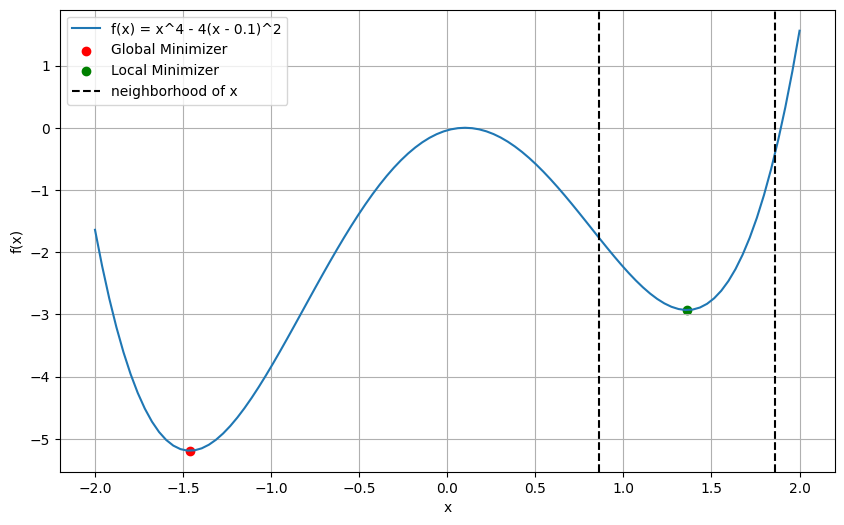

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#Function f
def f(x):
  return x**4 - 4*(x -0.1)**2

x = np.linspace(-2,2,100)
y = f(x)

#Getting global and local minimums
glob_min = minimize(f, x0=0)
loc_min = minimize(f, x0=1)

print("The global minimizer exists at x =",glob_min.x)
print("The local minimizer exists at x =",loc_min.x)

plt.figure(figsize=(10,6))

plt.plot(x,y, label = "f(x) = x^4 - 4(x - 0.1)^2")
plt.scatter(glob_min.x, glob_min.fun, color = "red", label = "Global Minimizer")
plt.scatter(loc_min.x, loc_min.fun, color = "green", label = "Local Minimizer")

#The neighborhood of x
plt.axvline(x = loc_min.x + 0.5, color = "black", label = "neighborhood of x", linestyle = "dashed")
plt.axvline(x = loc_min.x - 0.5, color = "black", linestyle = "dashed")


plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend()
plt.grid()
plt.show()

The example above is a function $f$, where $f(x) = x^4 - 4(x-0.1)^2$. In this example there exists both a local and global minimizer (both are gotten from Scipy's minimize function).
* The global minimizer, the red dot, satisfies the condition $f(x) ≥ f(x^*),$ for all $x$, where $x^* ≈-1.46$.
* The local minimizer, the green dot, satisfies the condition $f(x) ≥ f(x^*),$ for all $x$ in the neighborhood of $x^*$,  where $x^* ≈1.36$.
  * Since we can choose $δ > 0$, we choose $δ = 0.5$

## 3.3.2. Convexity and Global Minimizers

**Assume that for all functions, $f:\mathbb{R}^d → \mathbb{R}$**

* **Convex Set**: A set $D∈ \mathbb{R}^d$ is convex if for all $x,y ∈ D$ and for all $α ∈ [0,1]$
  * $(1-α)x + αy ∈ D$
    * In a visual sense, have two points $x$ and $y$ in an open ball and draw a straight line between them. The straight line is the Convex Set, since the equation above descibes a combination of the two points.

* **Convex Function**: A function $f$ is convex if for all $x,y ∈ \mathbb{R}$ and all $α ∈ [0,1]$
  * $f((1-α)x + αy) ≤ (1-α)f(x) + αf(y)$
    * More generally, a function $f: D → \mathbb{R}$ over a convex domains $D ⊆ \mathbb{R}^d$ is convex, if $x,y ∈ D$

* **First-Order Convexity Condition**: Let $f$ be continuously differentiable. Then $f$ is convex if and only if for all $x,y ∈ \mathbb{R}^d$
  * $f(y) ≥ f(x) + ∇f(x)^T(y-x)$

* **Second-Order Convexity Condition**: Let $f$ be twice continuously differentiable. Then $f$ is convex if and only if, for all $x∈ \mathbb{R}^d$
  * $H_f(x)$ is positive semi-definite

* **Global Minimizers of Convex Functions**:
  * Let $f$ be continuously differentiable and convex function,
    * If $∇f(x_0) = 0$ then $x_0$ is a global minimizer
  * Let $f$ be a convex function,
    * Then any local minimizer of $f$ is also a global minimizer

# 3.3.3. Gradient Descent

* **Gradient Descent**: It is an iterative optimization algorithm for finding a local minimum of a differentiable function.
  * Let $f: \mathbb{R}^d → \mathbb{R}$ be continuously differentiable. We want the unconstrained minimization problems in the form
    * min$_{x∈\mathbb{R}^d}f(x)$
  * The goal is to find all the stationary points of $f$, as in the all the points of $x$ such that $∇f(x) = 0$. Then choose the $x$ which produces the smallest value of $f(x)$

* **Least-Squares Example**: In the least-squares problem, minimizing $||Ax-b||^2$ leads to the equation $A^T Ax = A^T b$, which is the normal equations for the least-squares problem.

* **Steepest Descent**: The steepest descent method involves iteratively moving in the direction of gradient descent to reduce $f$
  * At each iteration, we take a step in the direction of the negative gradient in the form of
    * $x^{k+1} =  x^k - α_k ∇f(x^k)$, where k = 0,1,2,...
    * $α_k$ are the stepsizes, where $α_k > 0$

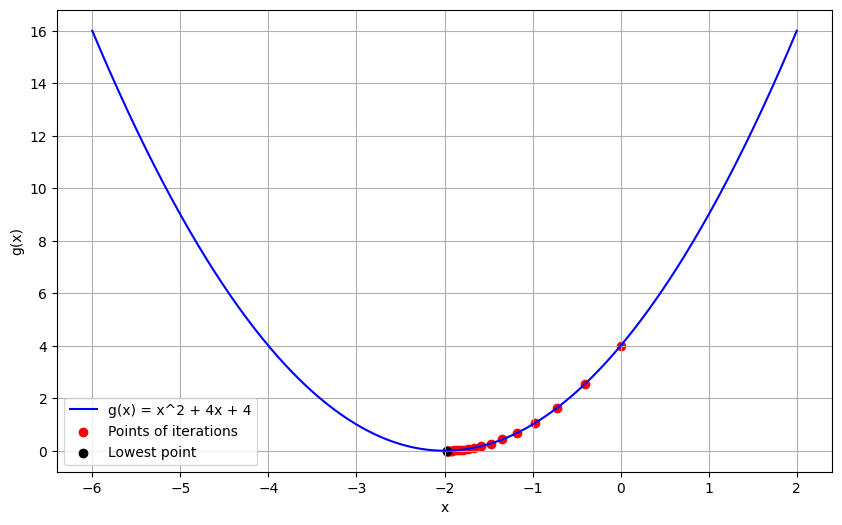

In [44]:
#Implementation of Steepest Descent

#Function g
def g(x):
  return x**2 + 4*x + 4

#The gradient of g
def dg(x):
  return 2*x + 4

#Gradient descent in the form of steepest descent
def gradient_descent(start, step_size, iterations):
  x = start
  x_points = [x]

  for a in range(iterations):
    x -= step_size * dg(x)
    x_points.append(x)

  return x, x_points

#Parameters
start = 0
step_size = 0.1
iterations = 20

#Getting the final x and past points
min_x, points = gradient_descent(start, step_size, iterations)

x_values = np.linspace(-6, 2, 400)
y_values = g(x_values)

plt.figure(figsize=(10,6))
plt.plot(x_values, y_values, label = "g(x) = x^2 + 4x + 4", color = "blue")

#Plot the iterations of x
plt.scatter(points, g(np.array(points)), label = "Points of iterations", color = "red")
#plot the final iteration of x
plt.scatter(min_x, g(min_x), label = "Lowest point", color = "black")

plt.xlabel("x")
plt.ylabel("g(x)")

plt.grid()
plt.legend()
plt.show()

The code above is an implementation of Gradient Descent in the form of Steepest Descent
* We define $g(x) = x^2 + 4x+ 4$
* We define the derivative(the gradient) as $g'(x) = 2x + 4$

The **gradient_descent** function implements the following equation
  * $x^{k+1} =  x^k - α_k ∇f(x^k)$
    * $α$ is the **step_size** variable
    * $∇f(x^k)$ is the derivative function **dg(x)**
    * $k$ is the **iterations** variable
    * The **start** variable is $x^0$, where k = 0

The **x_points** array is used the previous iterations, from $k = 0$ to $k = 20$